In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing import sequence

In [18]:
def LSTM_imdb(X_train, Y_train, num_words):
    model = Sequential()
    model.add(Embedding(num_words, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def preprocess_imdb_data(X_train, X_test, maxlen):
    X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
    X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
    return X_train, X_test

def train_model(model, epochs, batch_size):
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    return history

def visual_train_status(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
    plt.subplot(122)
    plt.plot(epochs, acc, "bo-", label="Training Acc")
    plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [19]:
num_words = 2000 # 20000
maxlen = 100
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)
X_train, X_test = preprocess_imdb_data(X_train, X_test, maxlen=maxlen)

model = LSTM_imdb(X_train, Y_train, num_words=num_words)
model.summary()

history = train_model(model, epochs=3, batch_size=128)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         256000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 158s - loss: 0.5121 - accuracy: 0.7473 - val_loss: 0.4096 - val_accuracy: 0.8144
Epoch 2/3
20000/20000 - 149s - loss: 0.3907 - accuracy: 0.8343 - val_loss: 0.3993 - val_accuracy: 0.8250
Epoch 3/3
20000/20000 - 147s - loss: 0.3584 - accuracy: 0.8471 - val_loss: 0.3802 - val_accuracy: 0.8352
測試資料集的準確度 = 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


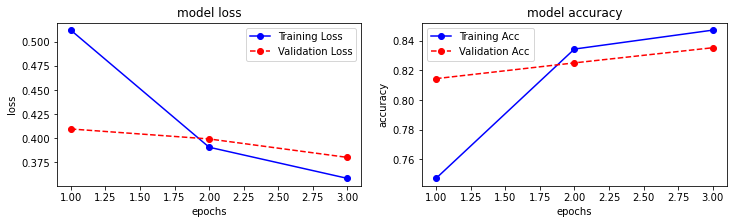

In [20]:
print(history.history.keys())
visual_train_status(history)